In [362]:
pip install pyforest


In [363]:
from pyforest import *
lazy_imports()
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor

In [364]:
df=pd.read_csv('/content/drive/MyDrive/Project Files/Concrete Compressive Strength.csv')
df.head()

<IPython.core.display.Javascript object>

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [365]:
# df=df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
#                       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",
#                       'Fly Ash (component 3)(kg in a m^3 mixture)':"ash",
#                       'Water (component 4)(kg in a m^3 mixture)':"Water",
#                       'Superplasticizer (component 5)(kg in a m^3 mixture)':"superplastic",
#                       'Coarse Aggregate (component 6)(kg in a m^3 mixture)':"coarseagg",
#                       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fineagg",
#                       'Age (day)':"age",
#                       'Concrete compressive strength(MPa, megapascals)':"strength"})

In [366]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [367]:
 df.shape

(1030, 9)

In [368]:
#checking NUll values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

No null values found

In [369]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


#Data Analysis

### cement

In [370]:
from scipy import stats
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['cement']))

1st quartile (Q1) is :  192.375
3rt quartile (Q3) is :  350.0
Interquartile range (IQR) is  157.625


In [371]:
#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',O_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [372]:
# checking presence of outliers with upper and lower limits
print('number of outliers in cement upper: ',df[df['cement']>586.4375]['cement'].count())
print('number of outliers in cement Lower: ',df[df['cement']<-44.0625]['cement'].count())

number of outliers in cement upper:  0
number of outliers in cement Lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cement')

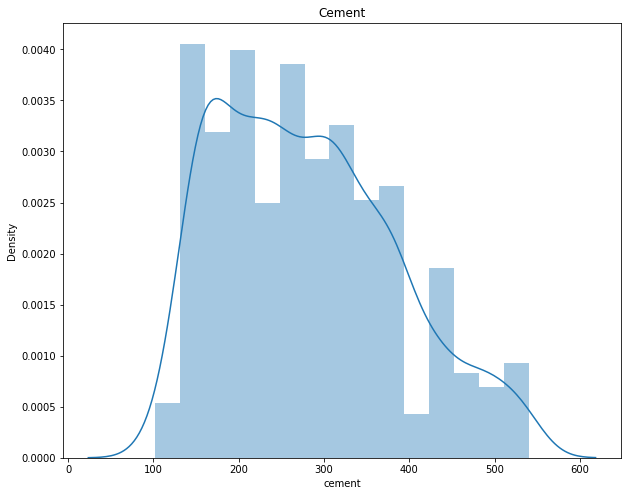

In [373]:
plt.figure(figsize=(10,8))
sns.distplot(df['cement']).set_title("Cement")

<IPython.core.display.Javascript object>

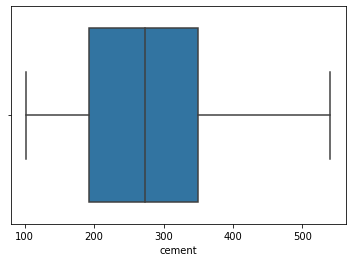

In [374]:
#distribution of cement
sns.boxplot(x='cement',data=df,orient='h')

#this shows there are no outliers found visually

### ASH

In [375]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['ash']))

#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in  Ash: ',L_outliers)
print('Upper outlier limit in Ash: ',O_outliers)

1st quartile (Q1) is :  0.0
3rt quartile (Q3) is :  118.27
Interquartile range (IQR) is  118.27
Lower outlier limit in  Ash:  -177.405
Upper outlier limit in Ash:  295.675


In [376]:
# checking presence of outliers with upper and lower limits
print('number of outliers in  Ash upper: ',df[df['ash']>295.675]['ash'].count())
print('number of outliers in  Ash Lower: ',df[df['ash']<-177.405]['ash'].count())

number of outliers in  Ash upper:  0
number of outliers in  Ash Lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Ash')

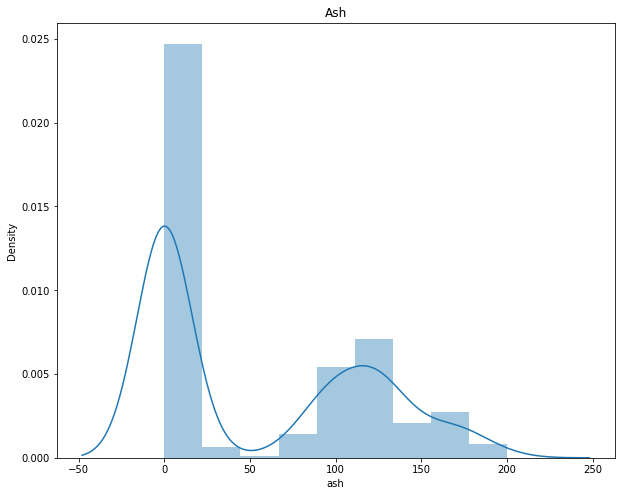

In [377]:
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title("Ash")

<IPython.core.display.Javascript object>

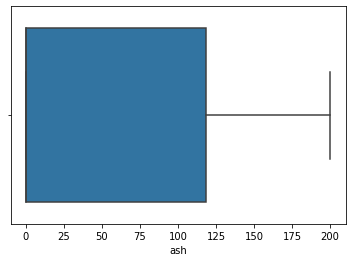

In [378]:
#distribution of cement
sns.boxplot(x='ash',data=df,orient='h')

#this shows there are no outliers found visually

### slag

In [379]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['slag']))

#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in  slag: ',L_outliers)
print('Upper outlier limit in slag: ',O_outliers)

1st quartile (Q1) is :  0.0
3rt quartile (Q3) is :  142.95
Interquartile range (IQR) is  142.95
Lower outlier limit in  slag:  -214.42499999999998
Upper outlier limit in slag:  357.375


In [380]:
# checking presence of outliers with upper and lower limits
print('number of outliers in  slag upper: ',df[df['slag']>357.375]['slag'].count())
print('number of outliers in  slag Lower: ',df[df['slag']<-214.424999999998]['slag'].count())

number of outliers in  slag upper:  2
number of outliers in  slag Lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Slag')

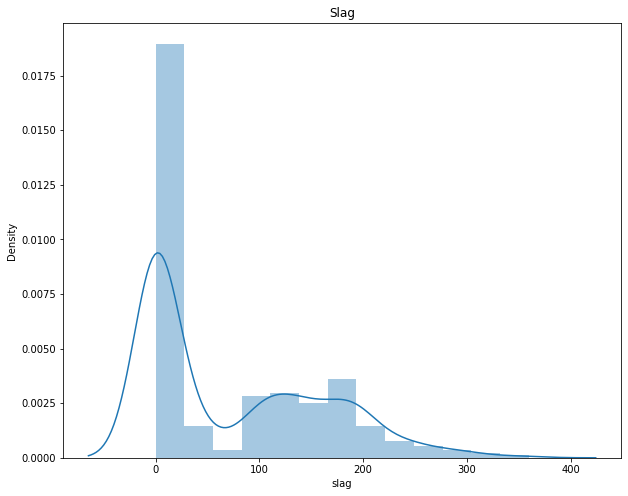

In [381]:
plt.figure(figsize=(10,8))
sns.distplot(df['slag']).set_title("Slag")

<IPython.core.display.Javascript object>

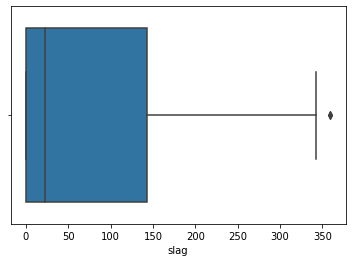

In [382]:
#distribution of cement
sns.boxplot(x='slag',data=df,orient='h')

#this shows there are  outliers found visually

### water


In [383]:
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['water']))

#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in  water: ',L_outliers)
print('Upper outlier limit in water: ',O_outliers)

1st quartile (Q1) is :  164.9
3rt quartile (Q3) is :  192.0
Interquartile range (IQR) is  27.099999999999994
Lower outlier limit in  water:  124.25000000000001
Upper outlier limit in water:  232.64999999999998


In [384]:
# checking presence of outliers with upper and lower limits
print('number of outliers in  water upper: ',df[df['water']>232.64999999999998]['water'].count())
print('number of outliers in  water Lower: ',df[df['water']<124.25000000000001]['water'].count())

number of outliers in  water upper:  4
number of outliers in  water Lower:  5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'water')

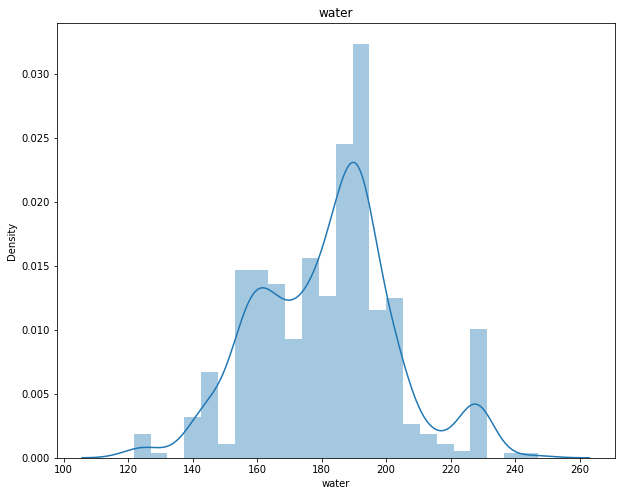

In [385]:
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title("water")

<IPython.core.display.Javascript object>

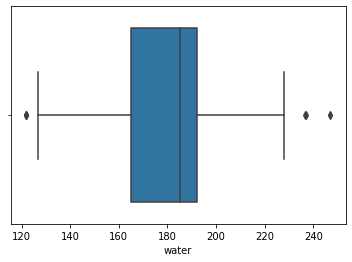

In [386]:
#distribution of cement
sns.boxplot(x='water',data=df,orient='h')

#this shows there are  outliers found visually

### superplastic


In [387]:
Q1=df['superplastic'].quantile(q=0.25)
Q3=df['superplastic'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['superplastic']))

#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in superplastic: ',L_outliers)
print('Upper outlier limit in superplastic: ',O_outliers)

1st quartile (Q1) is :  0.0
3rt quartile (Q3) is :  10.16
Interquartile range (IQR) is  10.16
Lower outlier limit in superplastic:  -15.24
Upper outlier limit in superplastic:  25.4


In [388]:
# checking presence of outliers with upper and lower limits
print('number of outliers in  superplastic upper: ',df[df['superplastic']>24.4]['superplastic'].count())
print('number of outliers in  superplastic Lower: ',df[df['superplastic']<-15.24]['superplastic'].count())

number of outliers in  superplastic upper:  10
number of outliers in  superplastic Lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Superplastic')

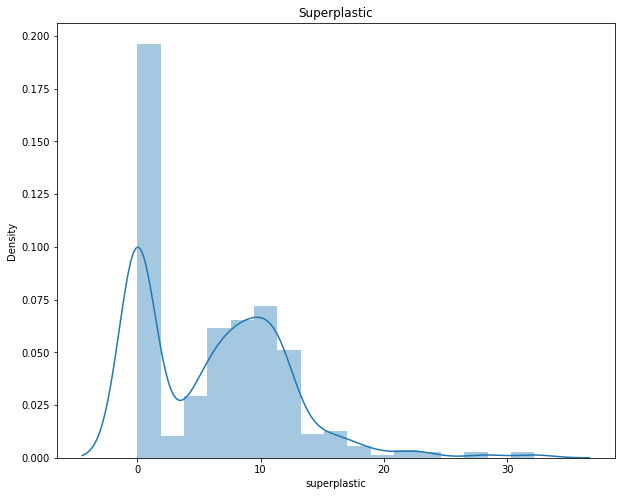

In [389]:
plt.figure(figsize=(10,8))
sns.distplot(df['superplastic']).set_title("Superplastic")

<IPython.core.display.Javascript object>

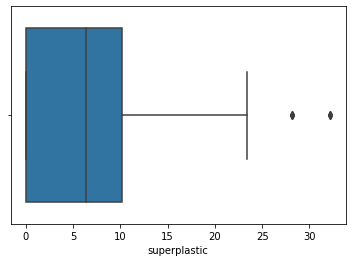

In [390]:
#distribution of cement
sns.boxplot(x='superplastic',data=df,orient='h')

#this shows there are  outliers found visually

### coarseagg


In [391]:
Q1=df['coarseagg'].quantile(q=0.25)
Q3=df['coarseagg'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['coarseagg']))

#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in coarseagg: ',L_outliers)
print('Upper outlier limit in coarseagg: ',O_outliers)

1st quartile (Q1) is :  932.0
3rt quartile (Q3) is :  1029.4
Interquartile range (IQR) is  97.40000000000009
Lower outlier limit in coarseagg:  785.8999999999999
Upper outlier limit in coarseagg:  1175.5000000000002


In [392]:
# checking presence of outliers with upper and lower limits
print('number of outliers in  water upper: ',df[df['coarseagg']>1175.5000000000002]['coarseagg'].count())
print('number of outliers in  water Lower: ',df[df['coarseagg']<785.8999999999999]['coarseagg'].count())

number of outliers in  water upper:  0
number of outliers in  water Lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'CoarseAgg')

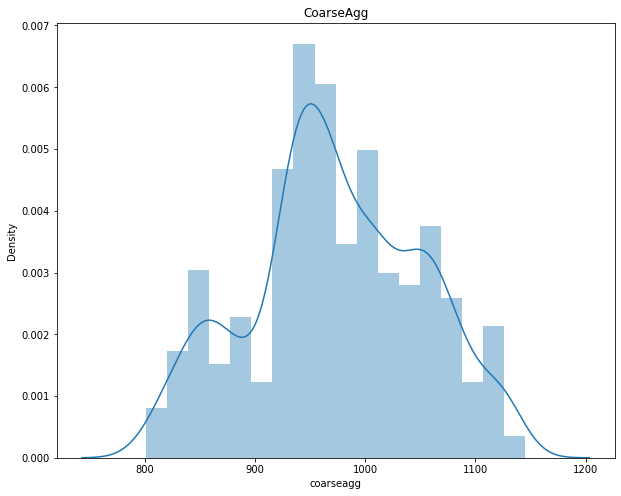

In [393]:
plt.figure(figsize=(10,8))
sns.distplot(df['coarseagg']).set_title("CoarseAgg")

<IPython.core.display.Javascript object>

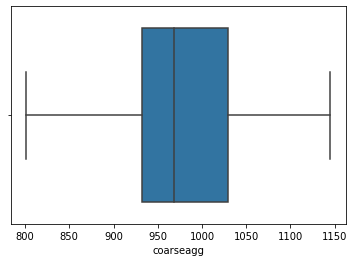

In [394]:
#distribution of cement
sns.boxplot(x='coarseagg',data=df,orient='h')

#this shows there are no outliers found visually

### fineagg


In [395]:
Q1=df['fineagg'].quantile(q=0.25)
Q3=df['fineagg'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['fineagg']))

#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in fineagg: ',L_outliers)
print('Upper outlier limit in fineagg: ',O_outliers)

1st quartile (Q1) is :  730.9499999999999
3rt quartile (Q3) is :  824.0
Interquartile range (IQR) is  93.05000000000007
Lower outlier limit in fineagg:  591.3749999999998
Upper outlier limit in fineagg:  963.575


In [396]:
# checking presence of outliers with upper and lower limits
print('number of outliers in  fineagg upper: ',df[df['coarseagg']>963.575]['coarseagg'].count())
print('number of outliers in  fineagg Lower: ',df[df['coarseagg']<591.3749999999998]['coarseagg'].count())

number of outliers in  fineagg upper:  563
number of outliers in  fineagg Lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'fineagg')

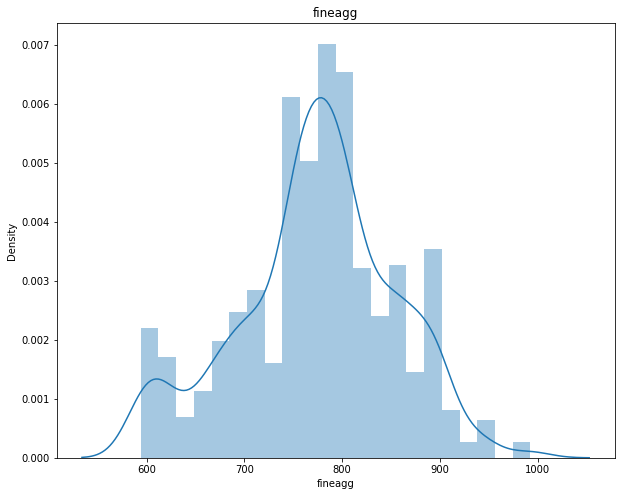

In [397]:
plt.figure(figsize=(10,8))
sns.distplot(df['fineagg']).set_title("fineagg")

<IPython.core.display.Javascript object>

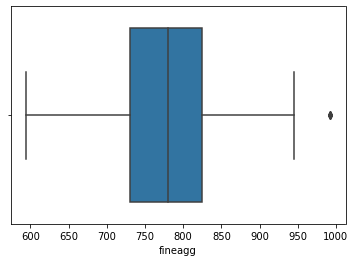

In [398]:
#distribution of cement
sns.boxplot(x='fineagg',data=df,orient='h')

#this shows there are  outliers found visually

### age


In [399]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st quartile (Q1) is : ',Q1)
print('3rt quartile (Q3) is : ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['age']))

#finding Outliers from Interquartile range

L_outliers = Q1-1.5*(Q3-Q1)
O_outliers = Q3+1.5*(Q3-Q1) 
print('Lower outlier limit in age: ',L_outliers)
print('Upper outlier limit in age: ',O_outliers)

1st quartile (Q1) is :  7.0
3rt quartile (Q3) is :  56.0
Interquartile range (IQR) is  49.0
Lower outlier limit in age:  -66.5
Upper outlier limit in age:  129.5


In [400]:
# checking presence of outliers with upper and lower limits
print('number of outliers in age upper: ',df[df['age']>129.5]['age'].count())
print('number of outliers in age Lower: ',df[df['age']<-66.5]['age'].count())

number of outliers in age upper:  59
number of outliers in age Lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'age')

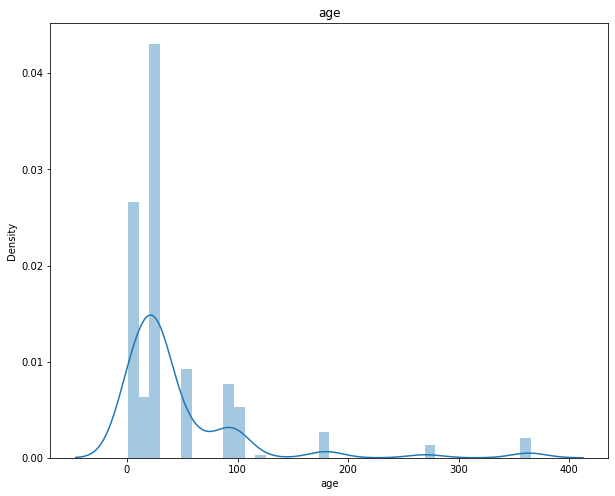

In [401]:
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title("age")

<IPython.core.display.Javascript object>

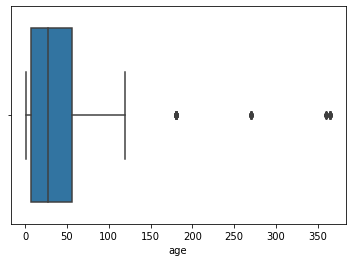

In [402]:
#distribution of cement
sns.boxplot(x='age',data=df,orient='h')

#this shows there are outliers found visually

### Multivariable Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

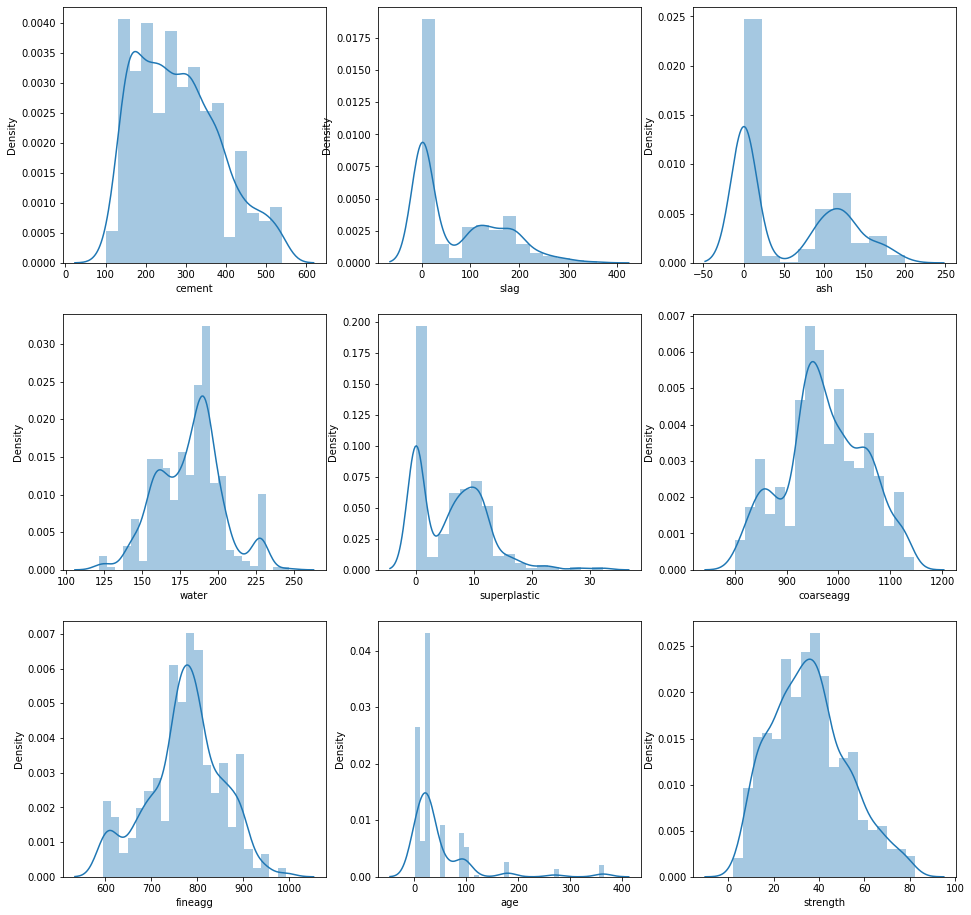

In [403]:
#Dist plot
fig, ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

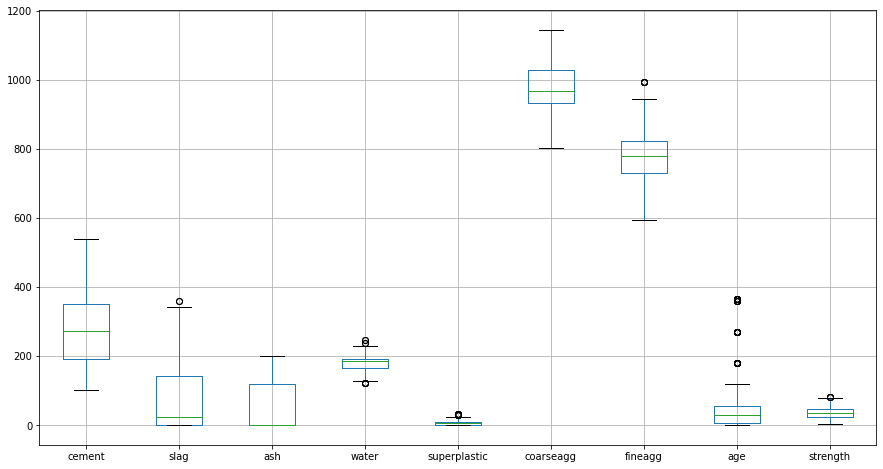

In [404]:
df.boxplot(figsize=(15,8))

*Since we have found outliers present and that may effect the actual outcome , so we are going to remove to minimalize the outlier by considering the median value of there respective column by considering the quantile*

In [405]:
for cols in df.columns[:-1]:
  Q1=df[cols].quantile(0.25)
  Q3=df[cols].quantile(0.75)
  iqr= Q3-Q1

  low= Q1-1.5*iqr
  high= Q3+1.5*iqr
  df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

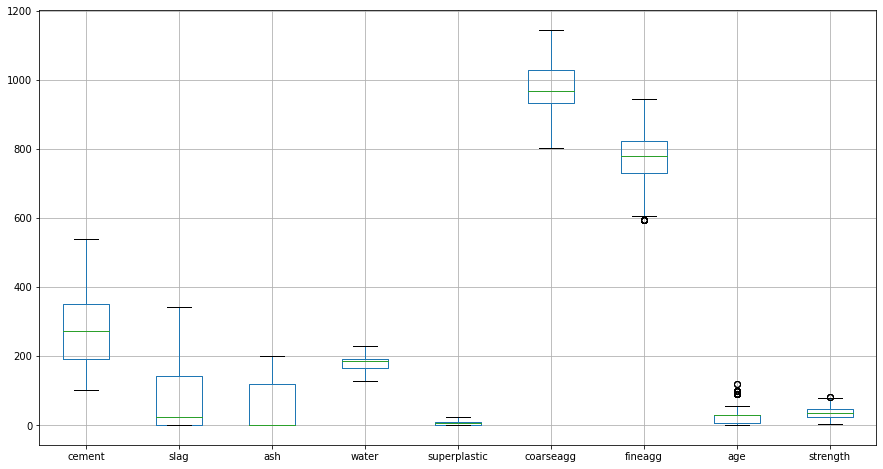

In [406]:
df.boxplot(figsize=(15,8))

*now we can see that the outliers are minimized *

# Model Training and finding the best one

In [407]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.296075


Now we are splitting the data in Dependent and independent varaibles as x and y 

In [408]:
x=df.drop('strength',axis=1)
y=df['strength']

In [409]:
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64

In [410]:
x

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [411]:
from scipy.stats import zscore
xscaled = x.apply(zscore)
xscaled_df=pd.DataFrame(xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [412]:
x_train,x_test,y_train,y_test =train_test_split(xscaled,y,test_size=0.3,random_state=1) 

<IPython.core.display.Javascript object>

**Multilinear regression**

In [413]:
model=LinearRegression()
model.fit(x_train,y_train)
ML_pred= model.predict(x_test)
# ML_train_score=model.score(x_train,y_train)
# ML_test_score=model.score(x_test,y_test)
# print("Multi Linear Regression Training Score = ",ML_train_score)
# print("Multi Linear Regression Test Score = ",ML_test_score)
ML_accuracy=metrics.r2_score(y_test,ML_pred)
print("Multi Linear Regression accuracy = ",accuracy)
MLR_Mean=metrics.mean_squared_error(y_test,ML_pred)
print("Multi Linear regression mean square error =  ",MLR_Mean)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Multi Linear Regression accuracy =  0.877608456648451


<IPython.core.display.Javascript object>

Multi Linear regression mean square error =   88.0394615825152


**Decision Tree**

In [414]:
dcr= DecisionTreeRegressor()
dcr.fit(x_train,y_train)
dcr_pred=model.predict(x_test)
dcr_accuracy=metrics.r2_score(y_test,dcr_pred)
print("Decision Tree Regression accuracy = ",dcr_accuracy)
dcr_mean=metrics.mean_squared_error(y_test,dcr_pred)
print("Decsion Tree regressor mean square error = ",dcr_mean)

<IPython.core.display.Javascript object>

Decision Tree Regression accuracy =  0.6641092873372312


<IPython.core.display.Javascript object>

Decsion Tree regressor mean square error =  88.0394615825152


**Random Forest**

In [415]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
R_pred = model.predict(x_test)
accuracy = metrics.r2_score(y_test,R_pred)
print("Random Forest Accuracy = ",accuracy)
r_Mean=metrics.mean_squared_error(y_test,R_pred)
print("Random Forest mean squrare error = ",r_Mean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest Accuracy =  0.8765582624091046


<IPython.core.display.Javascript object>

Random Forest mean squrare error =  32.35500031590237


**Gradient Boost Regressor**

In [416]:
GBR_model=GradientBoostingRegressor()
GBR_model.fit(x_train,y_train)
GB_pred=GBR_model.predict(x_test)
GBR_model.score(x_train,y_train)
GBR_model.score(x_test,y_test)
accuracy=metrics.r2_score(y_test,GB_pred)
print("Gradient Boost Regressor Accuracy = ",accuracy)
GB_meansquareerror=metrics.mean_squared_error(y_test,GB_pred)
print("GB Mean square error = ",GB_meansquareerror)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Gradient Boost Regressor Accuracy =  0.8823816703961012


<IPython.core.display.Javascript object>

GB Mean square error =  30.828641639039436


*So far as we observed , Gradient Boost have better accuracy and less mean square error *